<a href="https://colab.research.google.com/github/ritwikraha/computer-needs-glasses/blob/master/image-generation/Spright_Attend_and_Excite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and Imports

In [1]:
!pip install diffusers accelerate -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import torch
from diffusers.utils import load_image
from diffusers import DiffusionPipeline
from diffusers import AutoPipelineForImage2Image

from diffusers import StableDiffusionAttendAndExcitePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
seed = 49
generator = torch.Generator(device).manual_seed(seed)

In [4]:
prompt = "a man riding a green bike on a sand dune"

## Attend and Excite Pipeline

In [5]:
ane_pipeline = StableDiffusionAttendAndExcitePipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16
).to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
indices = ane_pipeline.get_indices(prompt)
print(indices)

{0: '<|startoftext|>', 1: 'a</w>', 2: 'man</w>', 3: 'riding</w>', 4: 'a</w>', 5: 'green</w>', 6: 'bike</w>', 7: 'on</w>', 8: 'a</w>', 9: 'sand</w>', 10: 'dune</w>', 11: '<|endoftext|>'}


## Using Language Model to get Indices of Objects

In [8]:
language_model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen1.5-0.5B-Chat", device_map="auto")
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen1.5-0.5B-Chat")

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
messages = [
    {
        "role": "system",
        "content": "Follow the examples and return the expected output",
    },
    {
        "role": "user",
        "content": "{0: 'Rain', 1: 'falls', 2: 'on', 3: 'the', 4: 'plain'}",
    },
    {
        "role": "assistant",
        "content": "0,4",
    },
    {
        "role": "user",
        "content": "{0: 'Children', 1: 'playing', 2: 'in',  3: 'park'}",
    },
    {
        "role": "assistant",
        "content": "0,3",
    },

    {
        "role": "user",
        "content": "{0: 'A', 1: 'beautiful', 2: 'sunset', 3: 'over', 4: 'the', 5: 'ocean'}",
    },
    {
        "role": "assistant",
        "content": "2,5",
    },
    {
        "role": "user",
        "content": "{0: 'The', 1: 'loud', 2: 'roar', 3: 'of', 4: 'the', 5: 'waterfall'}",
    },
    {
        "role": "assistant",
        "content": "5",
    },
    {
        "role": "user",
        "content": "{0: 'Stars', 1: 'twinkle', 2: 'in', 3: 'the', 4: 'night', 5: 'sky'}",
    },
    {
        "role": "assistant",
        "content": "0,4,5",
    },
    {
        "role": "user",
        "content": "{0: 'Green', 1: 'Leaves', 2: 'rustle', 3: 'in', 4: 'the', 5: 'gentle', 6: 'breeze'}",
    },
    {
        "role": "assistant",
        "content": "1,6",
    },
    {
        "role": "user",
        "content": "{0: 'A', 1: 'cold', 2: 'wind', 3: 'blows', 4: 'through', 5: 'the', 6: 'valley'}",
    },
    {
        "role": "assistant",
        "content": "2,6",
    },
    {
        "role": "user",
        "content": "{0: 'Some', 1: 'Fishes', 2: 'swim', 3: 'in', 4: 'the', 5: 'clear', 6: 'blue', 7: 'lake'}",
    },
    {
        "role": "assistant",
        "content": "1,7",
    },
    {"role": "user", "content": f"{indices}"},
]

In [10]:
text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
model_inputs = tokenizer([text], return_tensors="pt").to("cuda")
with torch.no_grad():
    generated_ids = language_model.generate(
        model_inputs.input_ids, max_new_tokens=512, temperature=0.0, do_sample=False
        )
    generated_ids = [
        output_ids[len(input_ids) :]
        for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    output_generation = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[
        0
    ]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [11]:
sampled_token_indices = list(map(int, output_generation.split(",")))
print(sampled_token_indices)

[1, 10]


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


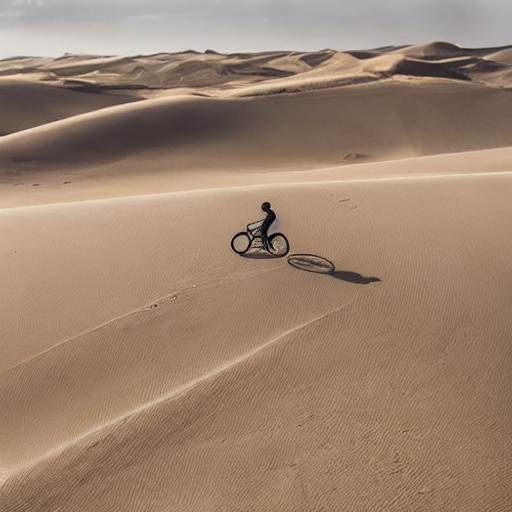

In [12]:
ane_image = ane_pipeline(
    prompt=prompt,
    token_indices=sampled_token_indices,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images[0]

ane_image

## SPRIGHT Pipeline

In [13]:
spright_pipeline = AutoPipelineForImage2Image.from_pretrained(
    "SPRIGHT-T2I/spright-t2i-sd2", torch_dtype=torch.float16, use_safetensors=True
).to(device)

model_index.json:   0%|          | 0.00/643 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/797 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 5000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/40 [00:00<?, ?it/s]

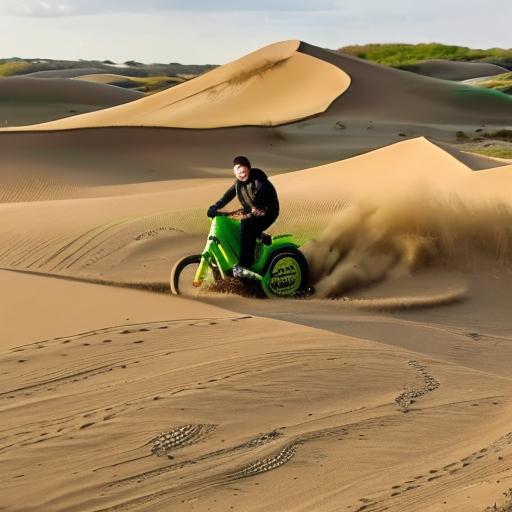

In [14]:
image = spright_pipeline(prompt, image=ane_image).images[0]
image